In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
houses = pd.read_csv("C:\\Users\\Dell\\Downloads\\DOB_Permit_Issuance.csv")

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,10,15,25,31,33,34,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
houses.shape

(3509983, 60)

In [5]:
houses.head(5)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1044756,353,EAST 68TH STREET,123655838,1,A2,Y,1443,20,...,NY,10065,2.1264e+09,03/29/2019 12:00:00 AM,3427682,40.765726,-73.958994,5.0,118.0,Lenox Hill-Roosevelt Island
1,BRONX,2000261,480,EAST 138 STREET,220689734,1,A2,N,2282,40,...,NY,11559,5.16491e+09,03/29/2019 12:00:00 AM,3610722,40.808137,-73.920616,8.0,25.0,Mott Haven-Port Morris
2,BROOKLYN,3002121,30,REMSEN STREET,322064289,1,A2,N,251,22,...,NY,11201,3.01513e+09,03/29/2019 12:00:00 AM,3610720,40.694847,-73.997238,33.0,301.0,Brooklyn Heights-Cobble Hill
3,QUEENS,4570298,51-35,REEDER ST,420812446,1,NB,N,1549,41,...,NY,11354,7.18779e+09,03/29/2019 12:00:00 AM,3610719,40.737942,-73.878281,25.0,473.0,Elmhurst
4,QUEENS,4274163,131-24,SPRINGFIELD BOULEVARD,420932824,1,NB,N,12729,16,...,NY,11413,3.47501e+09,03/29/2019 12:00:00 AM,3610917,40.683608,-73.751320,27.0,352.0,St. Albans


(-1.2256936036903732,
 1.1101798585693257,
 -1.1318518126579868,
 1.1286009554441545)

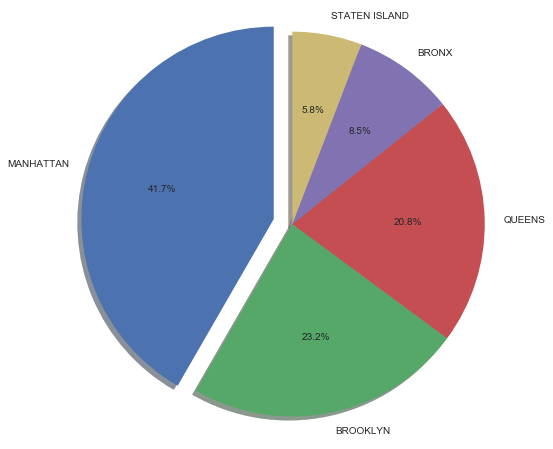

In [10]:
#Pie plot for percentage of cases borough-wise
total_entries_by_borough=houses['BOROUGH'].value_counts()
borough_names=houses['BOROUGH'].value_counts().index.values
count = total_entries_by_borough

labels = [str(s) for s in borough_names]

explode = (0.1, 0, 0,0,0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

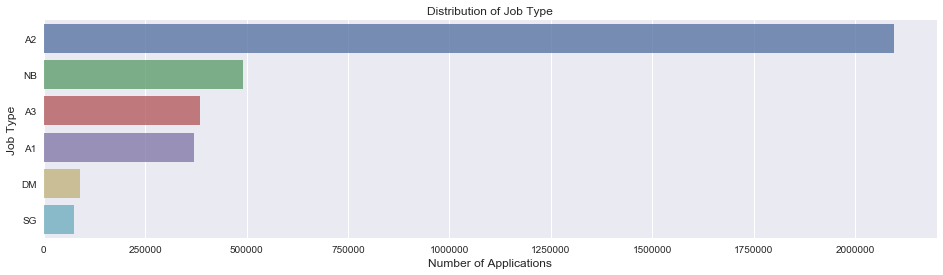

In [11]:
#Distribution of Job Types
x_ax=houses['Job Type'].value_counts()
y_ax=houses['Job Type'].value_counts().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_ax, y_ax, alpha=0.8)
plt.title("Distribution of Job Type",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Job Type', fontsize=12)
plt.xlabel('Number of Applications', fontsize=12)

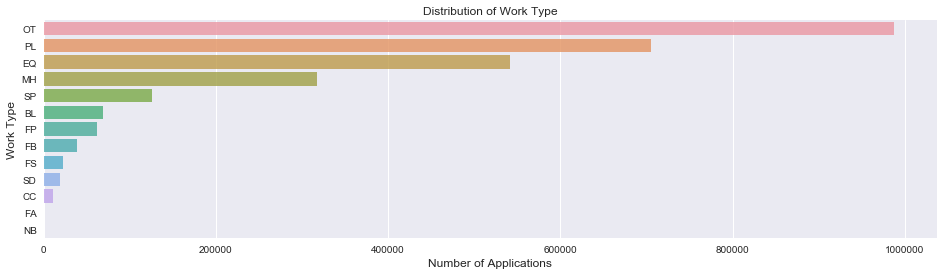

In [12]:
#Number of cases by work type
x_axw=houses['Work Type'].value_counts()
y_axw=houses['Work Type'].value_counts().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_axw, y_axw, alpha=0.8)
plt.title("Distribution of Work Type",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Work Type', fontsize=12)
plt.xlabel('Number of Applications', fontsize=12)

In [42]:
manhattan = houses[houses['BOROUGH'] == 'MANHATTAN']

In [45]:
bronx = houses[houses['BOROUGH'] == 'BRONX']
brooklyn = houses[houses['BOROUGH'] == 'BROOKLYN']
queens = houses[houses['BOROUGH'] == 'QUEENS']
staten = houses[houses['BOROUGH'] == 'STATEN ISLAND']

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x000001E068DE9DA0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  # update the location and size of the legend. This needs to


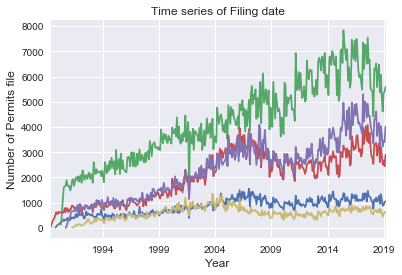

In [70]:
line1 = bronx.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
line2 = manhattan.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
line3 = queens.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
line4 = brooklyn.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
line5 = staten.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
locs, labels = plt.xticks()
plt.ylabel('Number of Permits file',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of Filing date")
ax.legend(labels)
ax.legend((line1, line2, line3, line4, line5), ('Bronx', 'Manhattan', 'Queens','Brooklyn','Staten Island'))

In [ ]:
#Trend of Permit filling

houses['Filing Date']=pd.to_datetime(houses['Filing Date'].values)

houses.set_index('Filing Date').resample('M').count()['BOROUGH'].plot()
plt.ylabel('Number of Permits file',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Time series of Filing date")

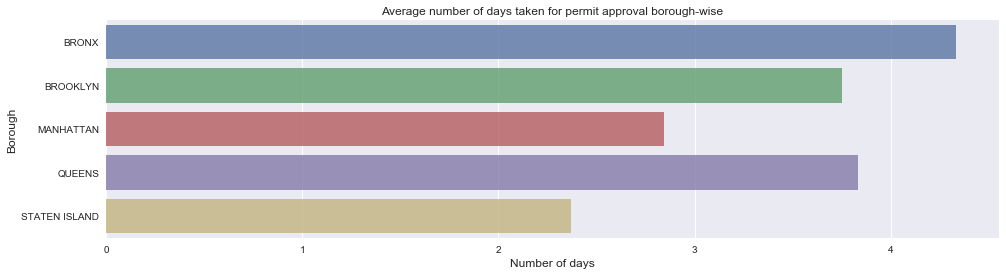

In [19]:
#Average number of days to permit approval borough-wise
houses['Filing Date']=pd.to_datetime(houses['Filing Date'].values)
houses['Issuance Date']=pd.to_datetime(houses['Issuance Date'].values)
houses['Days_Taken']=(houses['Issuance Date']-houses['Filing Date']).dt.days
x_axd=houses.groupby('BOROUGH')['Days_Taken'].mean()
y_axd=houses.groupby('BOROUGH')['Days_Taken'].mean().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_axd, y_axd, alpha=0.8)
plt.title("Average number of days taken for permit approval borough-wise",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Borough', fontsize=12)
plt.xlabel('Number of days', fontsize=12)

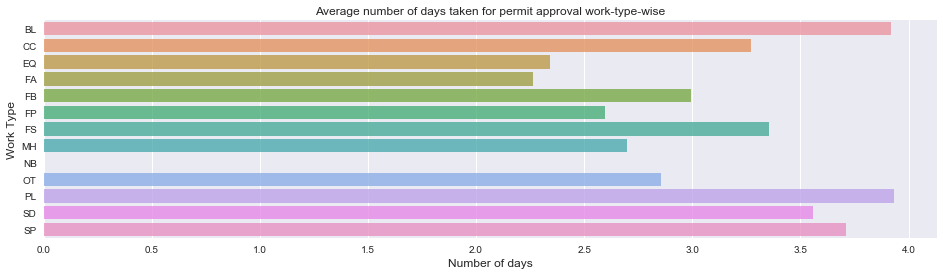

In [20]:
#Average approval time work type wise
x_axd2=houses.groupby('Work Type')['Days_Taken'].mean()
y_axd2=houses.groupby('Work Type')['Days_Taken'].mean().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_axd2, y_axd2, alpha=0.8)
plt.title("Average number of days taken for permit approval work-type-wise",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Work Type', fontsize=12)
plt.xlabel('Number of days', fontsize=12)

Part 2: DOB Issuance and Application filing data sets

In [21]:
applications = pd.read_csv("C:\\Users\\Dell\\Downloads\\DOB_Job_Application_Filings.csv")

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,6,13,14,21,38,59,60,68,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
print(applications.shape)
print(applications.head(5))

(1655252, 96)
       Job #  Doc #   Borough House #         Street Name  Block Lot    Bin #  \
0  420291794      1    QUEENS  183-16      JAMAICA AVENUE  10352  58  4438800   
1  420291801      1    QUEENS  150-33  CENTREVILLE STREET  11556  53  4248973   
2  421685439      1    QUEENS   34-56          200 STREET   6078  31  4619372   
3  340644128      1  BROOKLYN     354      DOUGLAS STREET    946  15  3019327   
4  421677974      2    QUEENS   35-37         36TH STREET    640   4  4009599   

  Job Type Job Status    ...     SPECIAL_ACTION_STATUS SPECIAL_ACTION_DATE  \
0       A3          X    ...                         N                 NaN   
1       A2          X    ...                         N                 NaN   
2       NB          J    ...                         N                 NaN   
3       A2          X    ...                         N                 NaN   
4       A2          R    ...                         N                 NaN   

  BUILDING_CLASS JOB_NO_GOOD_C

In [23]:
merge_data = pd.merge(houses,applications[['Job #','Initial Cost','Total Est. Fee']], on='Job #',how='inner')

In [24]:
print(merge_data.shape)
merge_data['Initial Cost'] = merge_data['Initial Cost'].str.replace('$', '')
merge_data['Initial Cost'] = merge_data['Initial Cost'].str.replace("'", '')
merge_data['Initial Cost']=merge_data['Initial Cost'].astype('float')
most_expensive_projects = (merge_data.sort_values('Initial Cost', ascending = False)).head(25)

(3717533, 63)


In [30]:
most_expensive_projects.head(2)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME,Days_Taken,Initial Cost,Total Est. Fee
1136210,BRONX,2003910,470,JACKSON AVENUE,201028930,1,A2,Y,2578,00027,...,11/03/2017 12:00:00 AM,2639843,40.811162,-73.909804,8.0,35.0,Mott Haven-Port Morris,0.0,966331800.0,$9953433.10
1136208,BRONX,2003910,470,JACKSON AVENUE,201028930,1,A2,Y,2578,27,...,11/03/2017 12:00:00 AM,2994049,40.811162,-73.909804,8.0,35.0,Mott Haven-Port Morris,0.0,966331800.0,$9953433.10


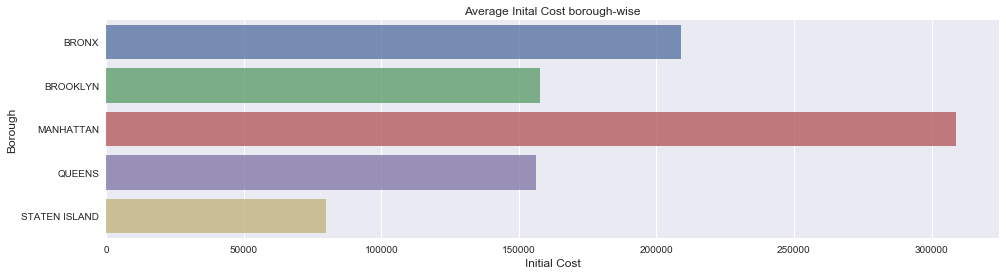

In [51]:
#Average Initial Cost borough-wise
x_axe=merge_data.groupby('BOROUGH')['Initial Cost'].mean()
y_axe=merge_data.groupby('BOROUGH')['Initial Cost'].mean().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_axe, y_axe, alpha=0.8)
plt.title("Average Inital Cost borough-wise",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Borough', fontsize=12)
plt.xlabel('Initial Cost', fontsize=12)

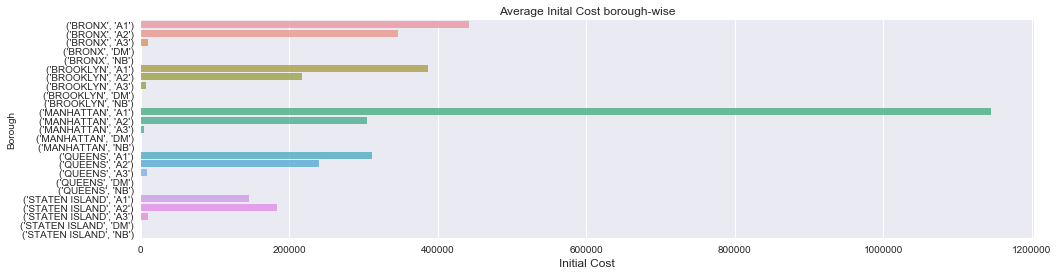

In [57]:
#Average tax Owner's Business Type
x_axe2=merge_data.groupby(['BOROUGH','Job Type'])['Initial Cost'].mean()
y_axe2=merge_data.groupby(['BOROUGH','Job Type'])['Initial Cost'].mean().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x_axe2, y_axe2, alpha=0.8)
plt.title("Average Inital Cost borough-wise",fontsize=12)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=20)
plt.ylabel('Borough', fontsize=10)
plt.xlabel('Initial Cost', fontsize=12)


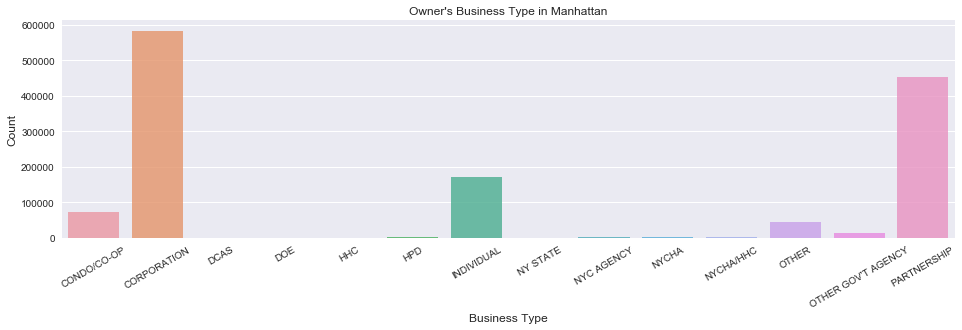

In [59]:
#Owner's Business Type in Manhattan
x_axm=manhattan.groupby("Owner's Business Type")['BOROUGH'].count()
y_axm=manhattan.groupby("Owner's Business Type")['BOROUGH'].count().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(y_axm, x_axm, alpha=0.8)
plt.title("Owner's Business Type in Manhattan",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Business Type', fontsize=12)

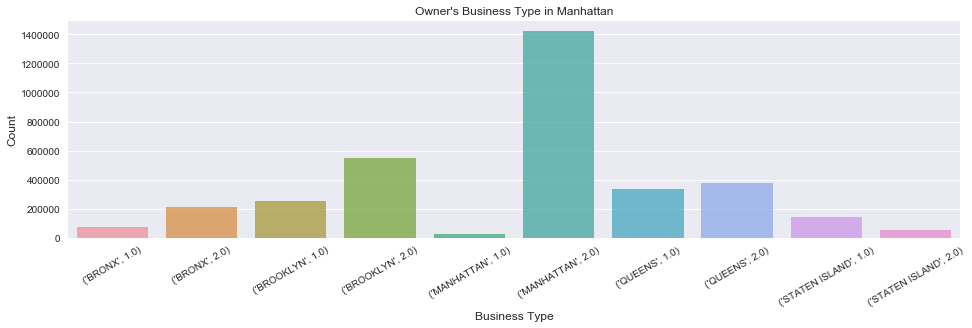

In [64]:
x_axm3=houses.groupby(['BOROUGH','Bldg Type'])['BOROUGH'].count()
y_axm3=houses.groupby(['BOROUGH','Bldg Type'])['BOROUGH'].count().index.values
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(y_axm3, x_axm3, alpha=0.8)
plt.title("Owner's Business Type in Manhattan",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Business Type', fontsize=12)